# Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
#importing dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import database file
df = pd.read_csv('census income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
#peep into dataframe's rows and columns count 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Data looks clean without null values. 9 categorical columns are present and 6 are ineteger

In [4]:
#verifying the null values for every features
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
#displaying unique value counts of columns
for i in df.columns:
    if df[i].dtypes == 'object':
        print(str(i) + ':' + str(df[i].unique()))
        print(df[i].value_counts())
        print('\n')

Workclass:[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Education:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype:

#### Analysis:
    1. Most of the population are of Private Workclass (69.7%). There are about 5% of people whose workclass are unknown
    2. ~46% of population are Married-civ-spouse, ~33% Never married & 13.6% are Divorced.
    3. ~85% of population is white.
    4. Data Contains approx 67% Male and 33% Female.
    5. 89% origins from the native country of US. Around 1.79% data is missing in this classification
    6. ~76% of people Income is less than 50K.
    
Conclusion:
    The dataset is imbalanced and skewed as most of the income census record is <50K. For the missing (?) values, values need to imputed or can be removed depending on the amount of its missing values

In [6]:
#displaying no.of rows for (?) values
df[df['Workclass']==' ?'][['Occupation','Native_country']]

,Occupation,Native_country
26,?,South
60,?,?
68,?,United-States
76,?,United-States
105,?,United-States
...,...,...
32529,?,United-States
32530,?,United-States
32538,?,United-States
32540,?,United-States


#### we have a total of 1836 rows whose workclass and occupation is unknown

In [7]:
df['Workclass'].mode(), df['Occupation'].mode(), df['Native_country'].mode()

(0     Private
 dtype: object,
 0     Prof-specialty
 dtype: object,
 0     United-States
 dtype: object)

In [8]:
#Since the unknown/null values are present in categorical features, we can replace them with the mode of correspondant features

df['Workclass'] = df['Workclass'].replace(' ?', ' Private')
df['Occupation'] = df['Occupation'].replace(' ?', ' Prof-speciality')
df['Native_country'] = df['Native_country'].replace(' ?', ' United-States')

In [9]:
#verify whether the (?) values are replaced
df[df['Workclass']==' ?'][['Occupation','Native_country']]

,Occupation,Native_country


#### Great!

In [10]:
#we can group unique columns of Education in concise manner like pre-school, school, HS, Bachelors, Master, PhD.
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [11]:
#removing the blank space ahead of each value
df['Education'] = df['Education'].str.replace(' ','')

In [12]:
#concising educational group
df['Education'] = df['Education'].replace(['1st-4th','5th-6th','7th-8th','9th','10th'], 'School')
df['Education'] = df['Education'].replace(['11th','12th'], 'HS')
df['Education'] = df['Education'].replace(['Some-college'], 'Bachelors') 
df['Education'] = df['Education'].replace(['Assoc-acdm','Assoc-voc', 'Prof-school'], 'Educational Prof')
df['Education'].unique()

array(['Bachelors', 'HS-grad', 'HS', 'Masters', 'School',
       'Educational Prof', 'Doctorate', 'Preschool'], dtype=object)

In [13]:
df['Native_country'] = df['Native_country'].str.replace(' ','')
df['Native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [14]:
df['Native_country'] = df['Native_country'].replace({'Cuba': 'Caribbean Island', 'Puerto-Rico': 'Caribbean Island',
                                                     'Jamaica': 'Caribbean Island', 'Honduras': 'Central America',
                                                     'Columbia': 'South America', 'Ecuador': 'South America',
                                                     'Haiti': 'Caribbean Island', 'Dominican-Republic': 'Caribbean Island',
                                                     'El-Salvador': 'Central America', 'Guatemala': 'Central America',
                                                     'Peru': 'South America', 'Mexico': 'Central America',
                                                     'Outlying-US(Guam-USVI-etc)': 'Outlying-US', 'Trinidad&Tobago': 'Caribbean Island',
                                                     'Nicaragua': 'Central America', 'South':'South America'})
df['Native_country'] = df['Native_country'].replace(['England', 'Germany','Italy', 'Poland', 'Portugal','France','Scotland',
                                                     'Greece', 'Ireland','Hungary', 'Holand-Netherlands'], 'Europe')
df['Native_country'] = df['Native_country'].replace({'Phillippines': 'Asia', 'Thailand': 'Asia', 'Laos': 'Asia', 'Taiwan': 'Asia',
                                                     'China': 'Asia', 'Japan': 'Asia', 'Vietnam': 'Asia', 'Hong':'Asia', 'Cambodia':'Asia',
                                                     'Iran': 'Middle East', 'Yugoslavia': 'Asia'})

In [15]:
df['Native_country'].unique()

array(['United-States', 'Caribbean Island', 'India', 'Central America',
       'South America', 'Europe', 'Canada', 'Middle East', 'Philippines',
       'Asia', 'Outlying-US', 'Trinadad&Tobago'], dtype=object)

## Desscriptive Statistics

In [16]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Analysis:
    1. Min age is 17 and Max age is 90yrs.
    2. Maximum Capital Gain is 99999 while minimum is 0. Mean capital gain is 1077
    3. Maximum capital loss is 4356.
    4. Max hours per week is 99 while its minimum is 1hr. Mean hours per week is 40.43hrs
Conclusion:
    There is wide range of difference and also there is anomality in scale especially in Fnlwgt

## Visualisation

Text(0, 0.5, 'Count')

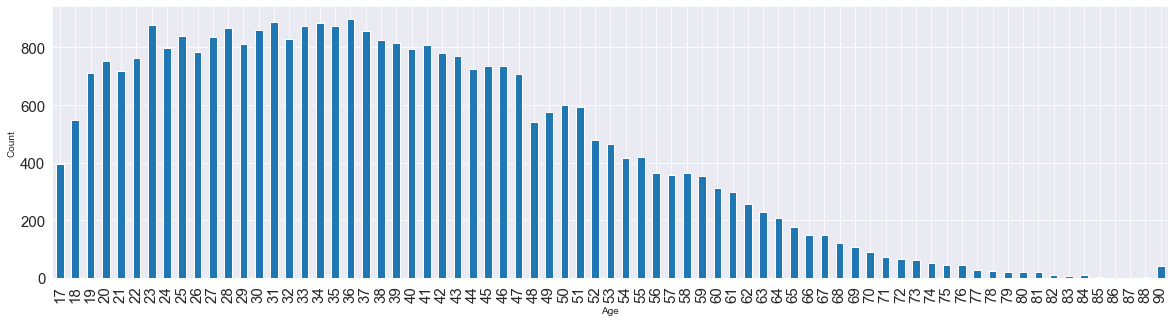

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,5))
df.groupby(['Age']).size().plot(kind='bar', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Count')

#### People of age 18yr - 47yrs has more appearance than any other

Text(0, 0.5, 'Count')

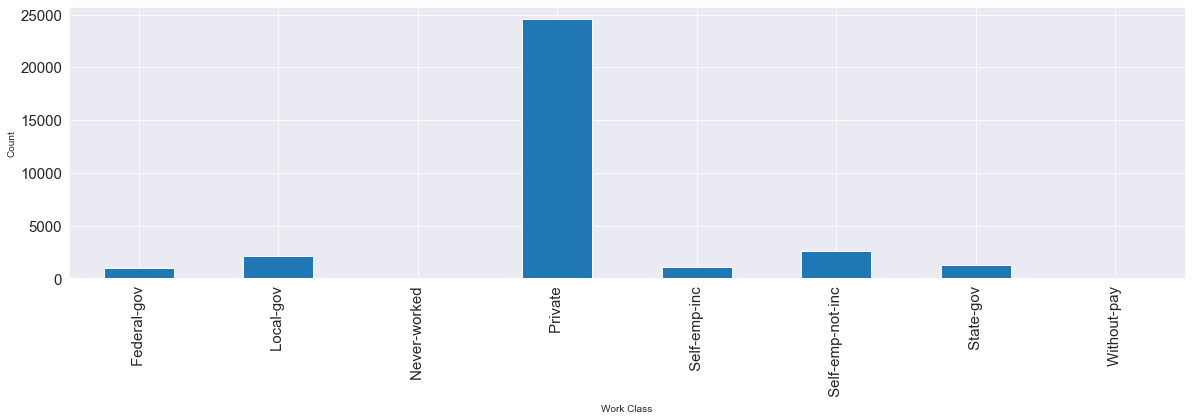

In [18]:
plt.figure(figsize=(20,5))
df.groupby(['Workclass']).size().plot(kind='bar', fontsize=15)
plt.xlabel('Work Class')
plt.ylabel('Count')

#### Majority of the population belongs to Private work class and there is no population who has never worked or is without pay

Text(0, 0.5, 'Count')

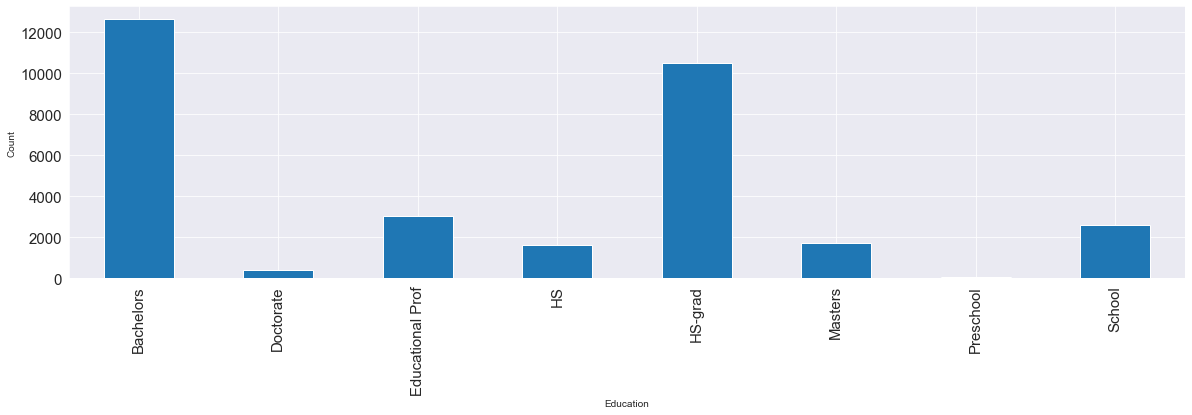

In [19]:
plt.figure(figsize=(20,5))
df.groupby(['Education']).size().plot(kind='bar', fontsize=15)
plt.xlabel('Education')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

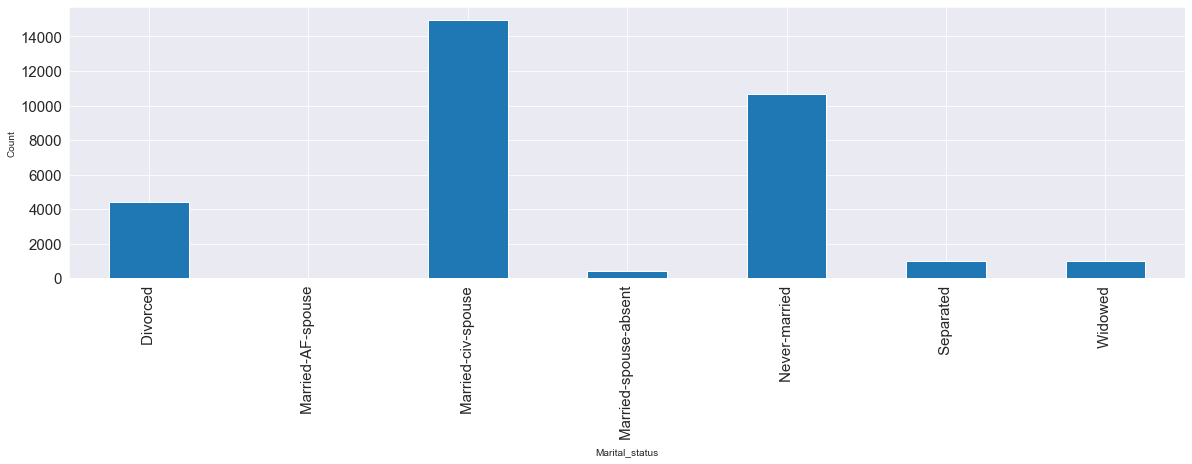

In [20]:
plt.figure(figsize=(20,5))
df.groupby(['Marital_status']).size().plot(kind='bar', fontsize=15)
plt.xlabel('Marital_status')
plt.ylabel('Count')

#### The proportion of Married-civ-spouse and Never Married are more while there's no single person who is married-af-spouse

Text(0, 0.5, 'Count')

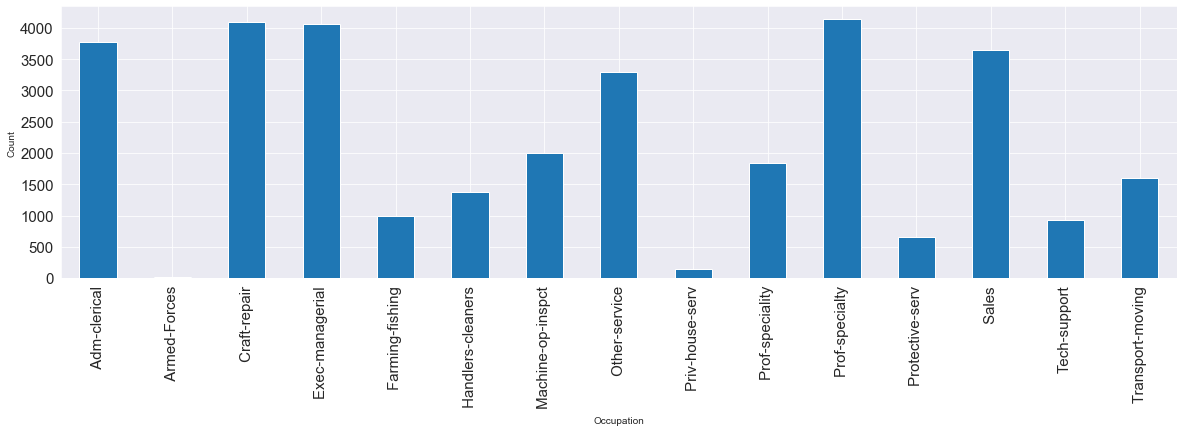

In [21]:
plt.figure(figsize=(20,5))
df.groupby(['Occupation']).size().plot(kind='bar', fontsize=15)
plt.xlabel('Occupation')
plt.ylabel('Count')

#### Person working as adm-clerical, craft-repair, manager, proffesor, Salesman are frequent appearing

Text(0, 0.5, 'Count')

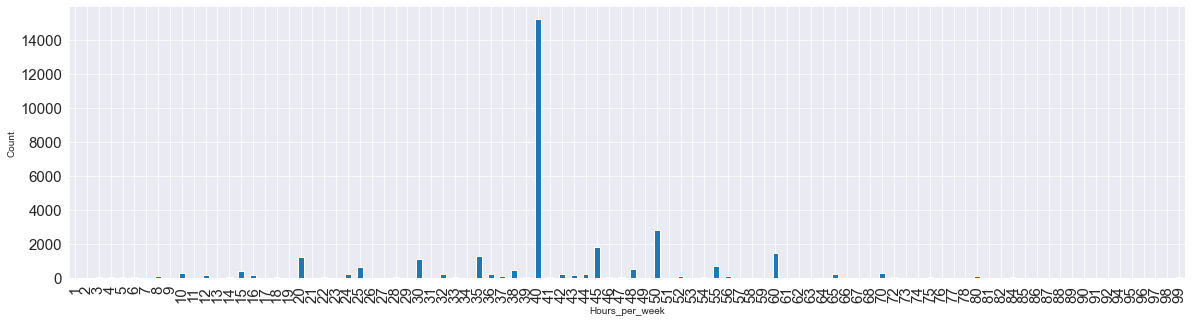

In [22]:
plt.figure(figsize=(20,5))
df.groupby(['Hours_per_week']).size().plot(kind='bar', fontsize=15)
plt.xlabel('Hours_per_week')
plt.ylabel('Count')

#### Most of the people work for 40hrs per week

Text(0, 0.5, 'Count')

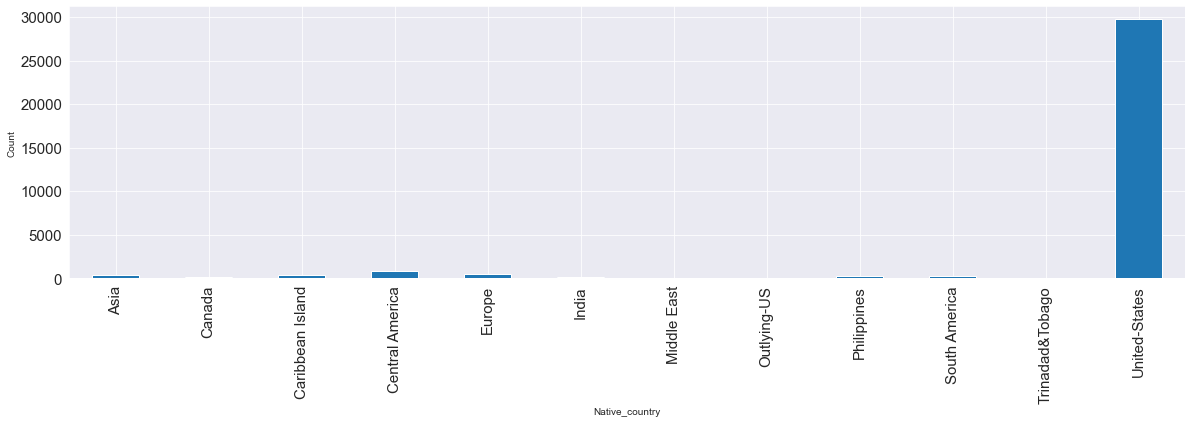

In [23]:
plt.figure(figsize=(20,5))
df.groupby(['Native_country']).size().plot(kind='bar', fontsize=15)
plt.xlabel('Native_country')
plt.ylabel('Count')

#### Most of the census population are from US

Text(0.5, 0, 'Age')

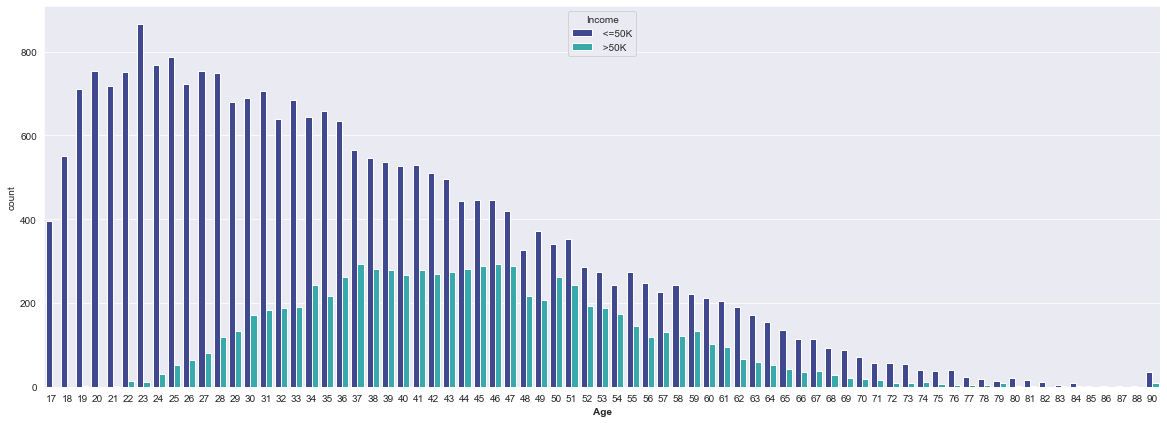

In [24]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'Age', hue = 'Income', data = df, palette = 'mako', saturation = 1.0)
plt.xlabel(xlabel = 'Age',fontweight = 'bold')

#### Population earning >50k lying in the age range 36yrs-51yrs

<AxesSubplot:xlabel='Sex', ylabel='count'>

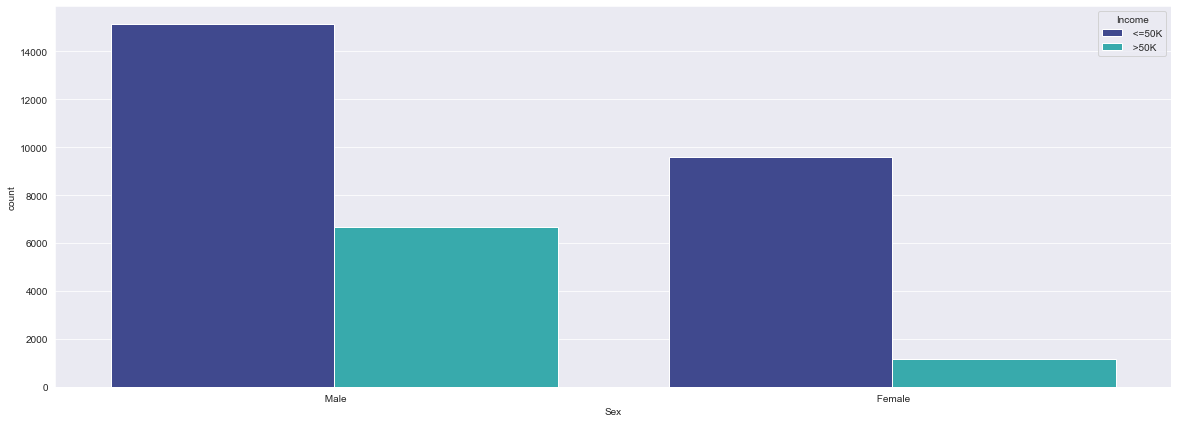

In [25]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'Sex', hue = 'Income', data = df, palette = 'mako', saturation = 1.0)


#### The male who are earning >50k are over 6000 and Female are near to 1000

<AxesSubplot:xlabel='Education', ylabel='count'>

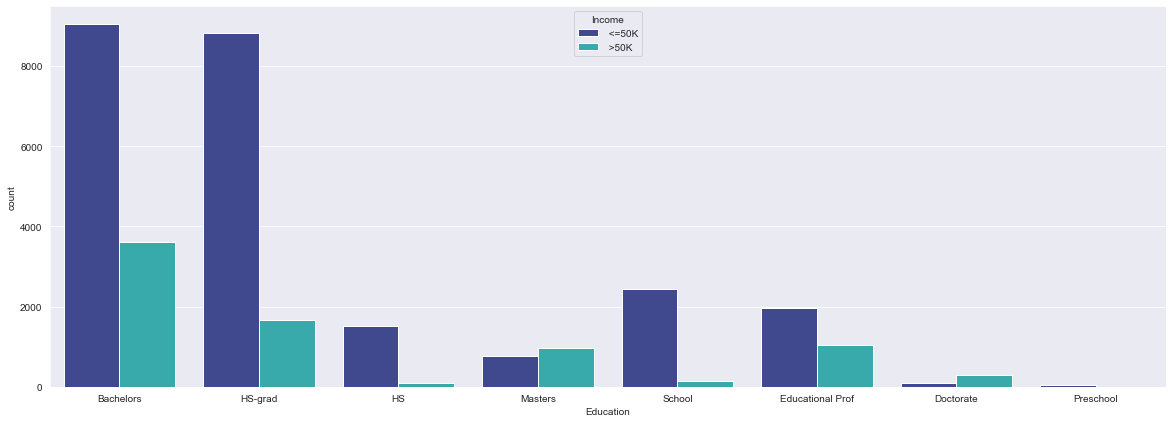

In [26]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'Education', hue = 'Income', data = df, palette = 'mako', saturation = 1.0)

#### Bachelors are likely to earn over 50k along with some people who are HS-grad, Masters, Education Prof and Doctorate

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

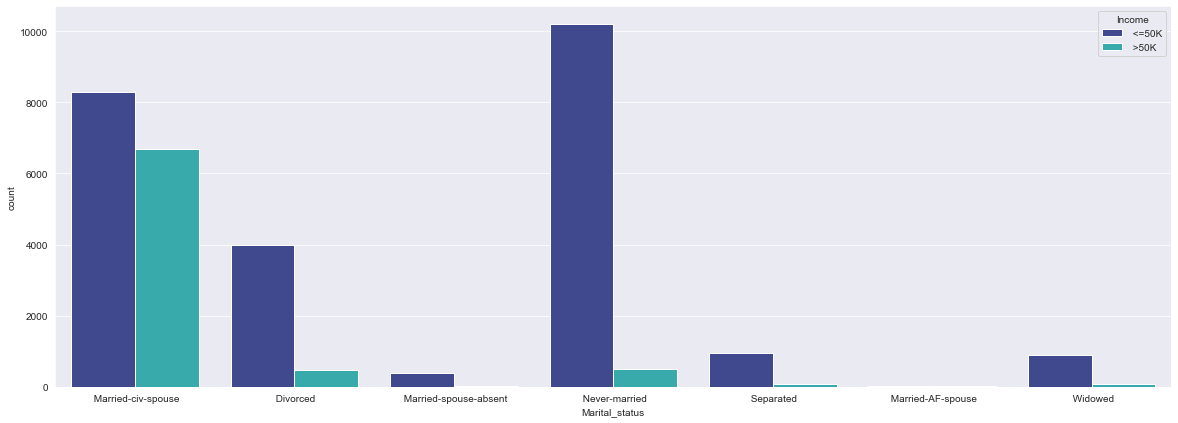

In [27]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'Marital_status', hue = 'Income', data = df, palette = 'mako', saturation = 1.0)

#### The one who are Married-civ-spouse have their income >50k

<AxesSubplot:xlabel='Occupation', ylabel='count'>

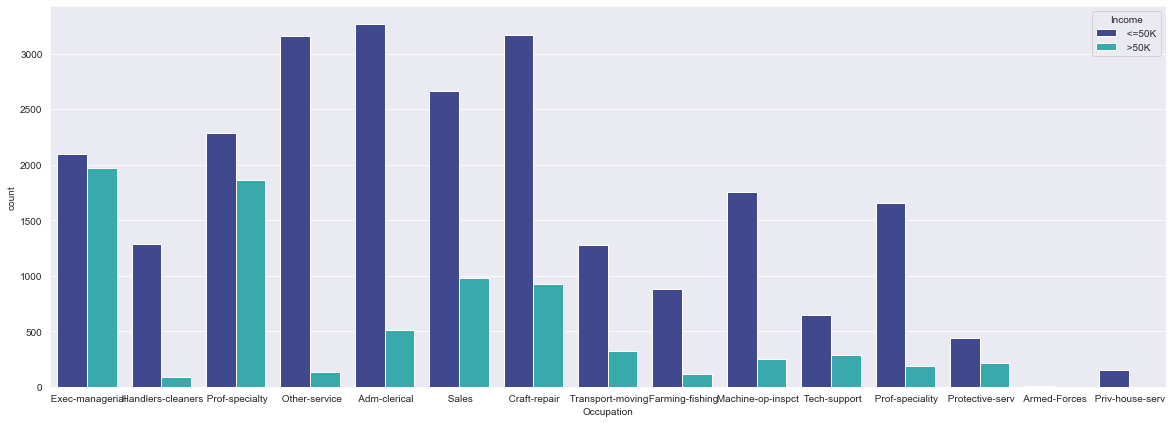

In [28]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'Occupation', hue = 'Income', data = df, palette = 'mako', saturation = 1.0)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

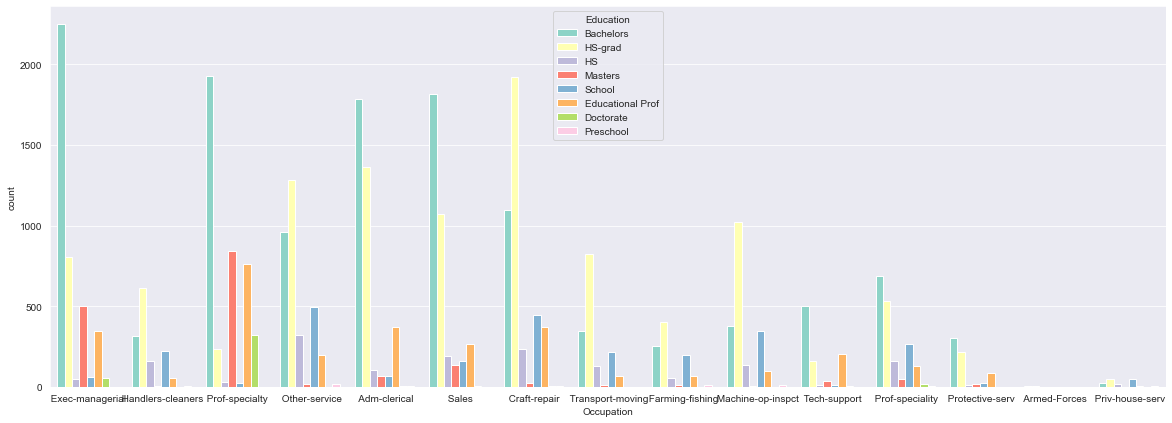

In [29]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'Occupation', hue = 'Education', data = df, palette = 'Set3', saturation = 1.0)

#### Bachelors & HS_grad people are enrolled in all type of occupation

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

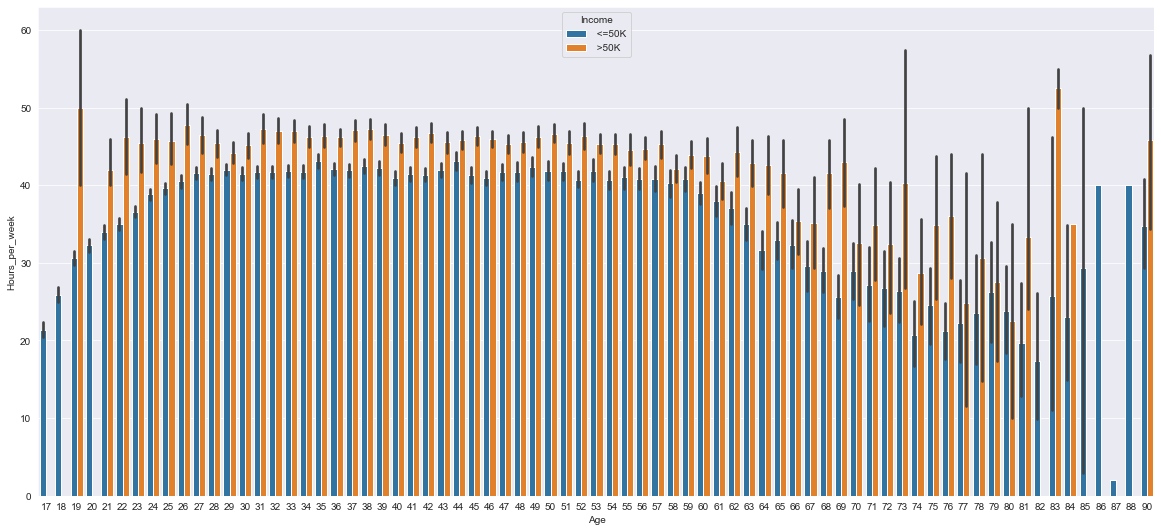

In [30]:
plt.figure(figsize=(20,9))
sns.barplot(x='Age', y = 'Hours_per_week', hue = 'Income', data=df)

#### People who are working over 40hrs can be seen earning more than 50k

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Prof-speciality'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

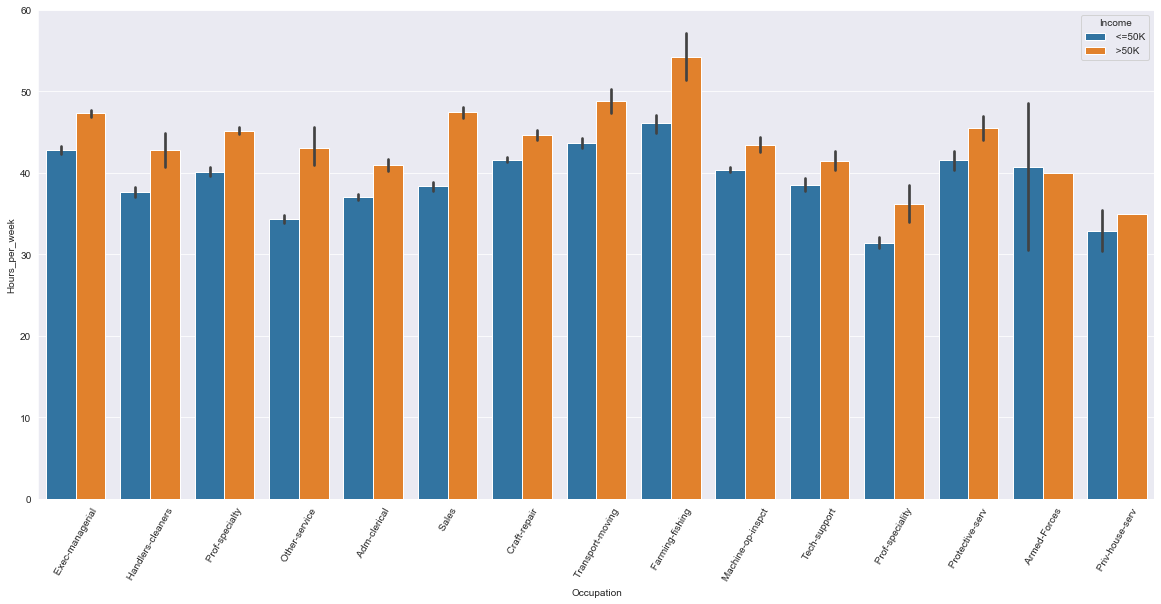

In [31]:
plt.figure(figsize=(20,9))
sns.barplot(x='Occupation', y = 'Hours_per_week', hue = 'Income', data=df)
plt.xticks(rotation = 60)

#### People in Armed Forces even after working more than 40hrs earn less than 50k

<AxesSubplot:xlabel='Relationship', ylabel='Hours_per_week'>

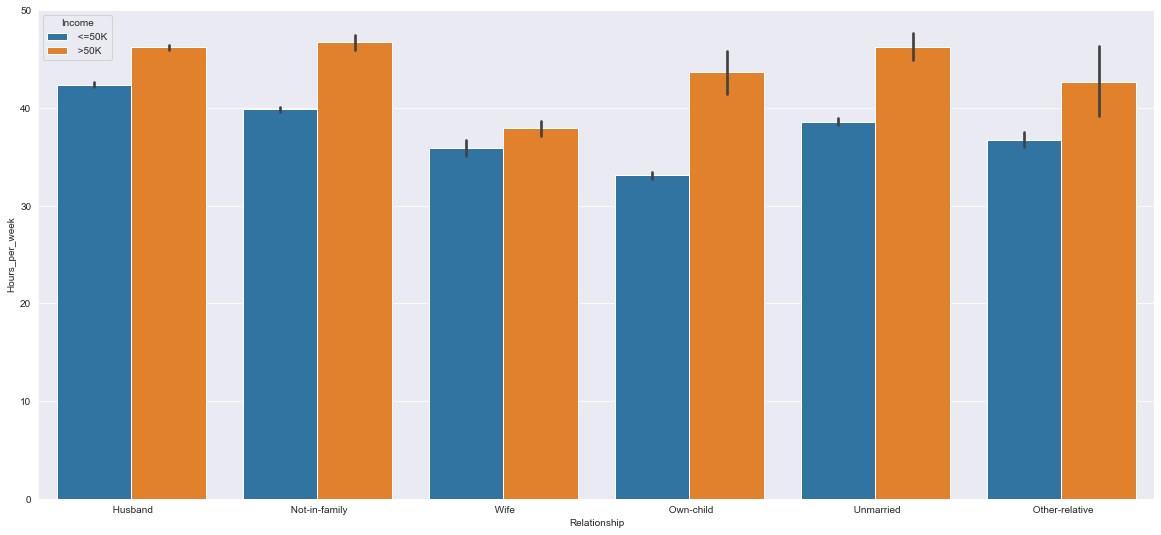

In [32]:
plt.figure(figsize=(20,9))
sns.barplot(x='Relationship', y = 'Hours_per_week', hue = 'Income', data=df)

#### There are certain people who are husband and working more than 40hrs but earning less than 50K

<AxesSubplot:xlabel='Occupation', ylabel='Capital_loss'>

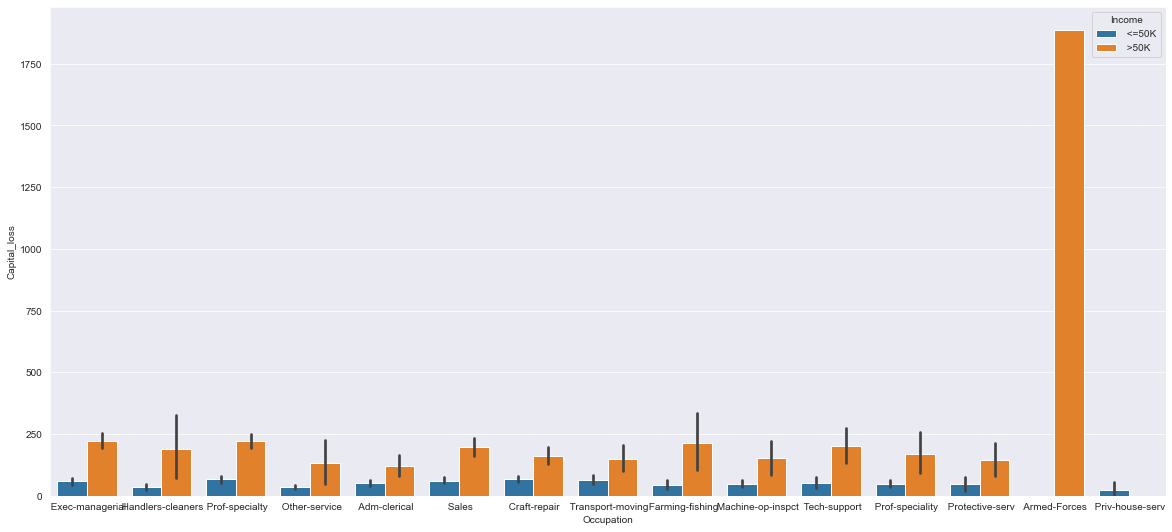

In [33]:
plt.figure(figsize=(20,9))
sns.barplot(x='Occupation', y = 'Capital_loss', hue = 'Income', data=df)

#### Noticably, The armed forces even after the highest capital losses earns more than 50K

<AxesSubplot:xlabel='Native_country', ylabel='Capital_loss'>

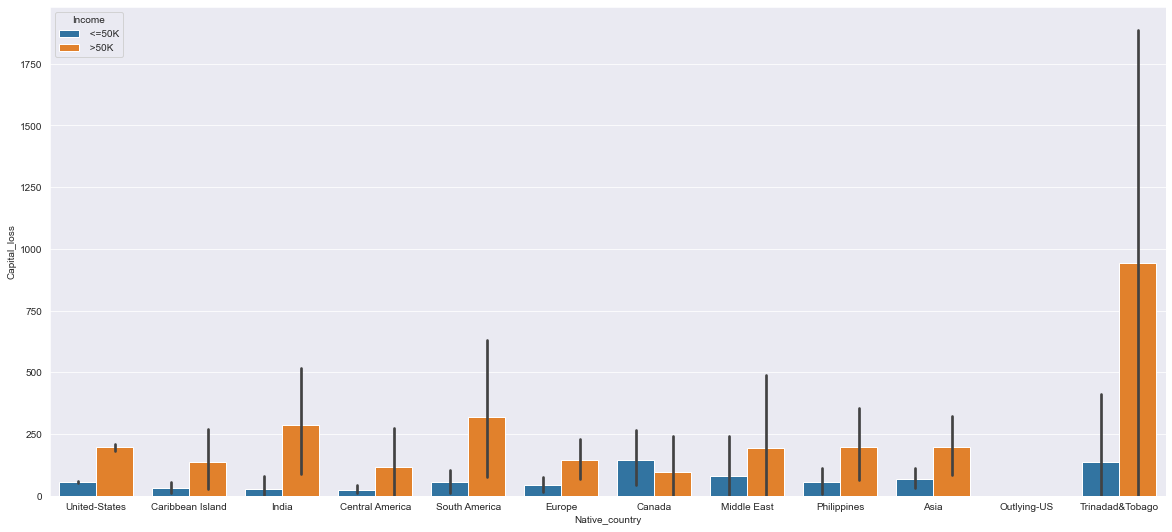

In [34]:
plt.figure(figsize=(20,9))
sns.barplot(x='Native_country', y = 'Capital_loss', hue = 'Income', data=df)

#### South Americans and Indian have higher capital loss and earns more thank 50k annually. On the other hand, Canadians with higher capital_loss earn lower than 50k

<AxesSubplot:xlabel='Occupation', ylabel='Capital_loss'>

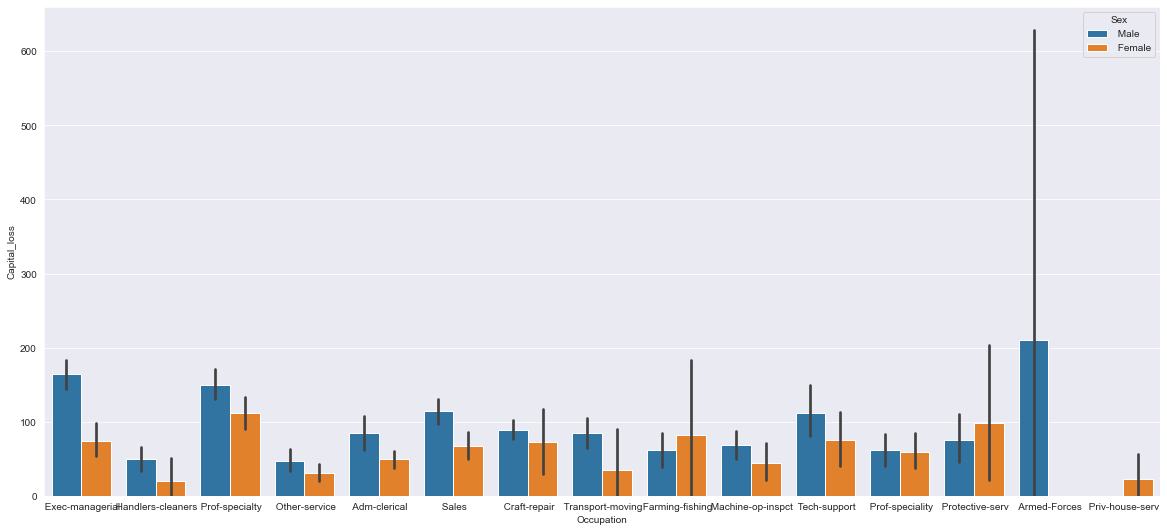

In [35]:
plt.figure(figsize=(20,9))
sns.barplot(x='Occupation', y = 'Capital_loss', hue = 'Sex', data=df)

#### Looks like male have more capital loss compare to females in all sector except protective-serv and farming-fishing

<AxesSubplot:>

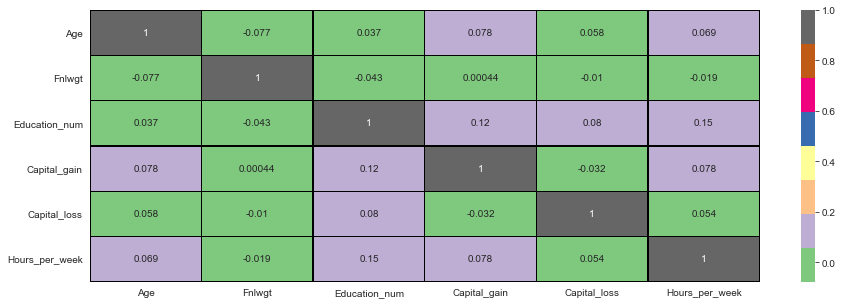

In [36]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot = True, linecolor='black',linewidths=0.4, cmap='Accent')

#### All the feature have minor to none correlation with each other

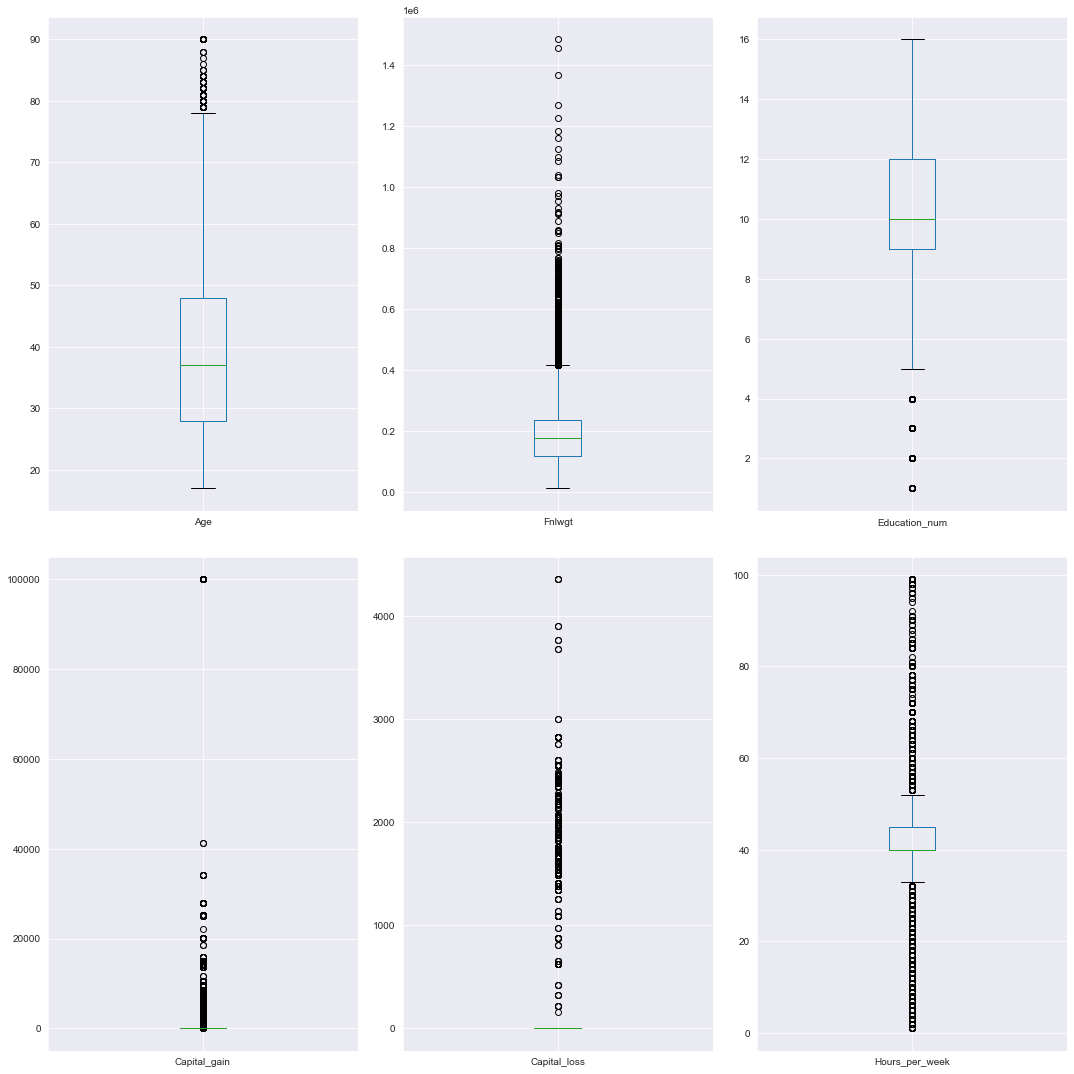

In [37]:
df.plot(kind='box', subplots=True, layout=(2,3), figsize=(15,15))
plt.tight_layout(pad=1,w_pad=1.5,h_pad=3)

In [38]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

## Preprocessing

In [39]:
#we can remove 'Education_num' since it represents the numeric form of education level corresponding to education
df.drop(['Education_num'], axis=1, inplace=True)

In [40]:
#encoding categorical columns to numerize

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == np.number:
        continue
    else:
        df[i] = le.fit_transform(df[i])

In [41]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [42]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [43]:
#checking for skewed data
df.skew()

Age               0.555583
Workclass         0.076178
Fnlwgt            0.063137
Education         0.306918
Marital_status   -0.013448
Occupation        0.090052
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.572186
Capital_loss      5.266058
Hours_per_week    0.069753
Native_country   -3.384742
Income            1.212383
dtype: float64

#### We might need log transformation to distribute the values like a log-normal distribution

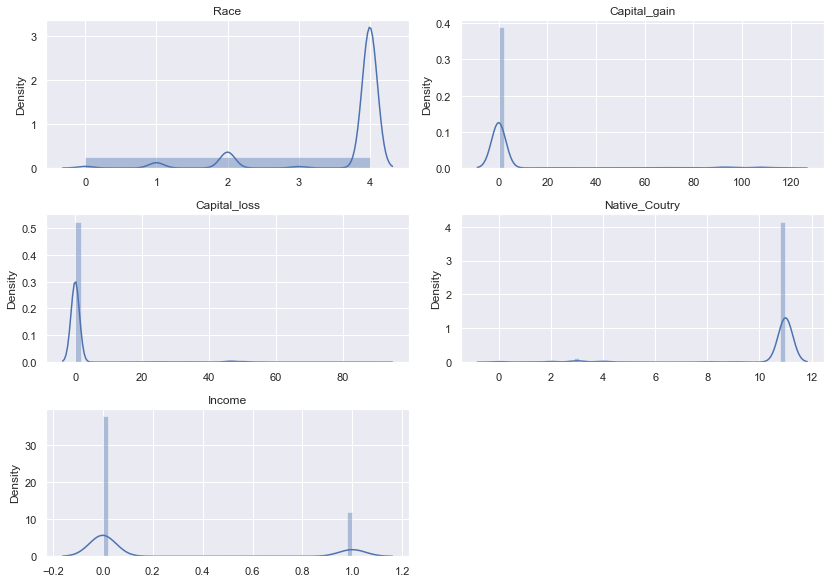

In [44]:
sns.set(rc={'figure.figsize': (11.7,8.27)})
plt.subplot(3,2,1)
sns.distplot(x = df['Race'], bins = 1)
plt.title('Race')

plt.subplot(3,2,2)
sns.distplot(x=df['Capital_gain'])
plt.title('Capital_gain')

plt.subplot(3,2,3)
sns.distplot(x=df['Capital_loss'])
plt.title('Capital_loss')

plt.subplot(3,2,4)
sns.distplot(x=df['Native_country'])
plt.title('Native_Coutry')

plt.subplot(3,2,5)
sns.distplot(x=df['Income'])
plt.title('Income')
plt.tight_layout()

#### Capital Gain and loss has more influence on affecting the prediction since they are continous values and is seen right skewed according to the graph

In [45]:
#applying transfomration to numerical feature until skewness hold stable value
df['Capital_gain'] = np.log1p(df['Capital_gain'])
df['Capital_loss'] = np.log1p(df['Capital_loss'])

In [46]:
#verifying the skewness 
df.skew()

Age               0.555583
Workclass         0.076178
Fnlwgt            0.063137
Education         0.306918
Marital_status   -0.013448
Occupation        0.090052
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.120932
Capital_loss      4.419728
Hours_per_week    0.069753
Native_country   -3.384742
Income            1.212383
dtype: float64

## Splitting of Dataset

In [47]:
x = df.drop(['Income'], axis = 1)
Y = df['Income']

In [48]:
#Standardizing Scale of values across the features for independent variables
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(x)

array([[ 0.83749664,  1.72133587, -1.25206002, ..., -0.21895916,
        -2.25444135,  0.28977053],
       [-0.042559  , -0.08522344,  0.59298455, ..., -0.21895916,
        -0.03112222,  0.28977053],
       [ 1.05751055, -0.08522344,  0.79964277, ..., -0.21895916,
        -0.03112222,  0.28977053],
       ...,
       [ 1.42420039, -0.08522344, -0.43253619, ..., -0.21895916,
        -0.03112222,  0.28977053],
       [-1.21596651, -0.08522344,  0.39376603, ..., -0.21895916,
        -1.67802528,  0.28977053],
       [ 0.98417258,  0.81805622,  1.21114062, ..., -0.21895916,
        -0.03112222,  0.28977053]])

## Modelling

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Logistic Regression

In [53]:
for i in range(20,70):
    x_train, x_test, y_train, y_test = train_test_split(x,Y, test_size=.25, random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    y_pred = log_reg.predict(x_test)
    
    print('At random state: ', i)
    print('Model Prediction on Training dataset:',round(log_reg.score(x_train,y_train)*100,2))
    print('Model Prediction on Test Dataset:',round(accuracy_score(y_test,y_pred)*100,2))
    print(confusion_matrix(y_test,y_pred))
    print('\n')

At random state:  20
Model Prediction on Training dataset: 77.07
Model Prediction on Test Dataset: 76.51
[[5715  448]
 [1464  513]]


At random state:  21
Model Prediction on Training dataset: 78.81
Model Prediction on Test Dataset: 79.07
[[5770  411]
 [1293  666]]


At random state:  22
Model Prediction on Training dataset: 78.05
Model Prediction on Test Dataset: 78.91
[[5915  303]
 [1414  508]]


At random state:  23
Model Prediction on Training dataset: 78.82
Model Prediction on Test Dataset: 79.2
[[5780  464]
 [1229  667]]


At random state:  24
Model Prediction on Training dataset: 79.15
Model Prediction on Test Dataset: 78.29
[[5670  502]
 [1265  703]]


At random state:  25
Model Prediction on Training dataset: 78.89
Model Prediction on Test Dataset: 79.13
[[5704  445]
 [1254  737]]


At random state:  26
Model Prediction on Training dataset: 79.03
Model Prediction on Test Dataset: 78.29
[[5777  362]
 [1405  596]]


At random state:  27
Model Prediction on Training dataset: 76.6

#### We'll select random_state=35

## Parameter Tuning & Cross validation

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
def cv_score(model):
    x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.25, random_state=42)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('Accuracy on training set: ', model.score(x_train, y_train))
    print('Accuracy on validation set: ', accuracy_score(y_test,y_pred))
    
    score = cross_val_score(model,x, Y)
    print('CV score: ', np.mean(score))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

### Decision Tree Classifier

In [59]:
dtc = DecisionTreeClassifier()
dtc_para = {'criterion': ['gini','entropy'], 
            'splitter':['best','random'],
            'max_depth': [10,20,30,40,50],
            'min_samples_split': [2,4,6,8,10],
            }
dtc_tuning = GridSearchCV(estimator = dtc, param_grid = dtc_para, cv=5, scoring='accuracy',)

dtc_tuning.fit(x,Y)
print(dtc_tuning.best_params_)
print(dtc_tuning.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'best'}
0.8515663390663392


In [62]:
dtc = DecisionTreeClassifier(criterion = 'gini',splitter = 'best',max_depth = 10, min_samples_split = 10)
cv_score(dtc)

Accuracy on training set:  0.8625307125307126
Accuracy on validation set:  0.8491400491400491
CV score:  0.8515663390663392
[[5817  340]
 [ 888 1095]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6157
           1       0.76      0.55      0.64      1983

    accuracy                           0.85      8140
   macro avg       0.82      0.75      0.77      8140
weighted avg       0.84      0.85      0.84      8140



### MultioNomialNB

In [67]:
mnb = MultinomialNB()
mnb_para = {'alpha':[3.0,2.5,2.0,1.5,1.4,1.3,1.3,1.2,1.1,1.0,0.1],
            'fit_prior':[True,False]}
mnb_tuning = GridSearchCV(estimator = mnb, param_grid = mnb_para,cv=5, scoring = 'accuracy', error_score = 'raise')

mnb_tuning.fit(x,Y)
print(mnb_tuning.best_params_)
print(mnb_tuning.best_score_)

{'alpha': 3.0, 'fit_prior': True}
0.6252149877149877


In [68]:
mnb = MultinomialNB(alpha = 3.0, fit_prior = True)
cv_score(mnb)

Accuracy on training set:  0.6258394758394759
Accuracy on validation set:  0.624938574938575
CV score:  0.6252149877149877
[[3912 2245]
 [ 808 1175]]
              precision    recall  f1-score   support

           0       0.83      0.64      0.72      6157
           1       0.34      0.59      0.43      1983

    accuracy                           0.62      8140
   macro avg       0.59      0.61      0.58      8140
weighted avg       0.71      0.62      0.65      8140



### KNeighbors Classifier

In [69]:
knn = KNeighborsClassifier()
knn_para = {'n_neighbors': list(range(1,10)),
            'weights': ['uniform','distance'],
            'algorithm': ['auto','ball_tree','kd_tree','brute'],
            'metric':['euclidean','minkowski']}
knn_tuning = GridSearchCV(estimator = knn, param_grid = knn_para, cv=5, scoring = 'accuracy')
knn_tuning.fit(x,Y)
print(knn_tuning.best_params_)
print(knn_tuning.best_score_)

{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
0.7524262899262899


In [70]:
Knn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform',algorithm = 'bal_tree', metric = 'euclidean')
cv_score(knn)

Accuracy on training set:  0.8178542178542179
Accuracy on validation set:  0.7358722358722358
CV score:  0.7360257985257985
[[5431  726]
 [1424  559]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      6157
           1       0.44      0.28      0.34      1983

    accuracy                           0.74      8140
   macro avg       0.61      0.58      0.59      8140
weighted avg       0.71      0.74      0.71      8140



### Random Forest Classifier

In [73]:
rfc = RandomForestClassifier()
rfc_para = {'n_estimators':[100,125,150,200,250],
            'criterion': ['gini','entropy'],
           'max_features': ['auto','sqrt','log2']}
rfc_tuning = GridSearchCV(estimator = rfc, param_grid = rfc_para, cv = 10,scoring = 'accuracy')
rfc_tuning.fit(x,Y)
print(rfc_tuning.best_params_)
print(rfc_tuning.best_score_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}
0.8561425061425062


In [74]:
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features = 'auto')
cv_score(rfc)

Accuracy on training set:  0.9999590499590499
Accuracy on validation set:  0.8545454545454545
CV score:  0.855896805896806
[[5734  423]
 [ 761 1222]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6157
           1       0.74      0.62      0.67      1983

    accuracy                           0.85      8140
   macro avg       0.81      0.77      0.79      8140
weighted avg       0.85      0.85      0.85      8140



### SGDClassifier

In [75]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd_para = {'alpha': [1,1e-01,1e-02,1e-03,1e-04,1e-05],
            'penalty':['l2','l1'],
            'learning_rate': ['optimal','constant','invscaling']}
sgd_tuning = GridSearchCV(estimator = sgd, param_grid = sgd_para, cv = 5, scoring = 'accuracy')
sgd_tuning.fit(x,Y)
print(sgd_tuning.best_params_)
print(sgd_tuning.best_score_)

{'alpha': 0.0001, 'learning_rate': 'optimal', 'penalty': 'l1'}
0.7576167076167076


In [77]:
sgd = SGDClassifier(alpha = 0.0001, penalty = 'l1', learning_rate = 'optimal')
cv_score(sgd)

Accuracy on training set:  0.7522932022932023
Accuracy on validation set:  0.749017199017199
CV score:  0.7615479115479115
[[5286  871]
 [1172  811]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      6157
           1       0.48      0.41      0.44      1983

    accuracy                           0.75      8140
   macro avg       0.65      0.63      0.64      8140
weighted avg       0.74      0.75      0.74      8140



## Saving the model

In [81]:
import pickle
file = 'Census_Income.pkl'
pickle.dump(rfc,open(file,'wb'))